In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from mlxtend.plotting import plot_decision_regions

In [ ]:
dataset = pd.read_csv('Social_Network_Ads.csv')
dataset.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [ ]:
# Here is the single command to drop the columns
dataset = dataset.drop(columns=['User ID', 'Gender'])

In [7]:
dataset.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


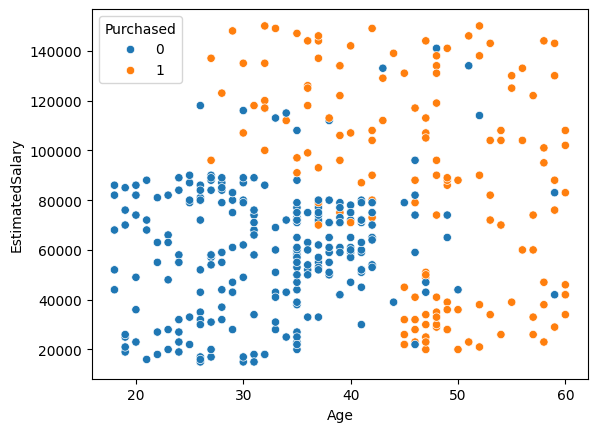

In [27]:
sns.scatterplot(data=dataset, x='Age', y='EstimatedSalary', hue='Purchased')
plt.show()

In [8]:
dataset.isnull().sum()

Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [10]:
x = dataset.iloc[:, :-1]
y = dataset["Purchased"]

In [11]:
sc = StandardScaler()
sc.fit(x)
x = pd.DataFrame(sc.transform(x), columns=x.columns)

In [12]:
x

,Age,EstimatedSalary
0,-1.781797,-1.490046
1,-0.253587,-1.460681
2,-1.113206,-0.785290
3,-1.017692,-0.374182
4,-1.781797,0.183751
...,...,...
395,0.797057,-0.844019
396,1.274623,-1.372587
397,1.179110,-1.460681
398,-0.158074,-1.078938


In [14]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [39]:
dt = DecisionTreeClassifier(max_depth=3)
dt.fit(x_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,3
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [33]:
dt1 = DecisionTreeClassifier(criterion='entropy')
dt1.fit(x_train, y_train)

,criterion,'entropy'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [40]:
dt.score(x_test, y_test)*100

91.25

In [41]:
dt.score(x_train, y_train)*100

91.875

In [19]:
dt.predict([[19, 76000]])

c:\Users\Aamir Neyazi\Downloads\Machine Learning\.venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1])

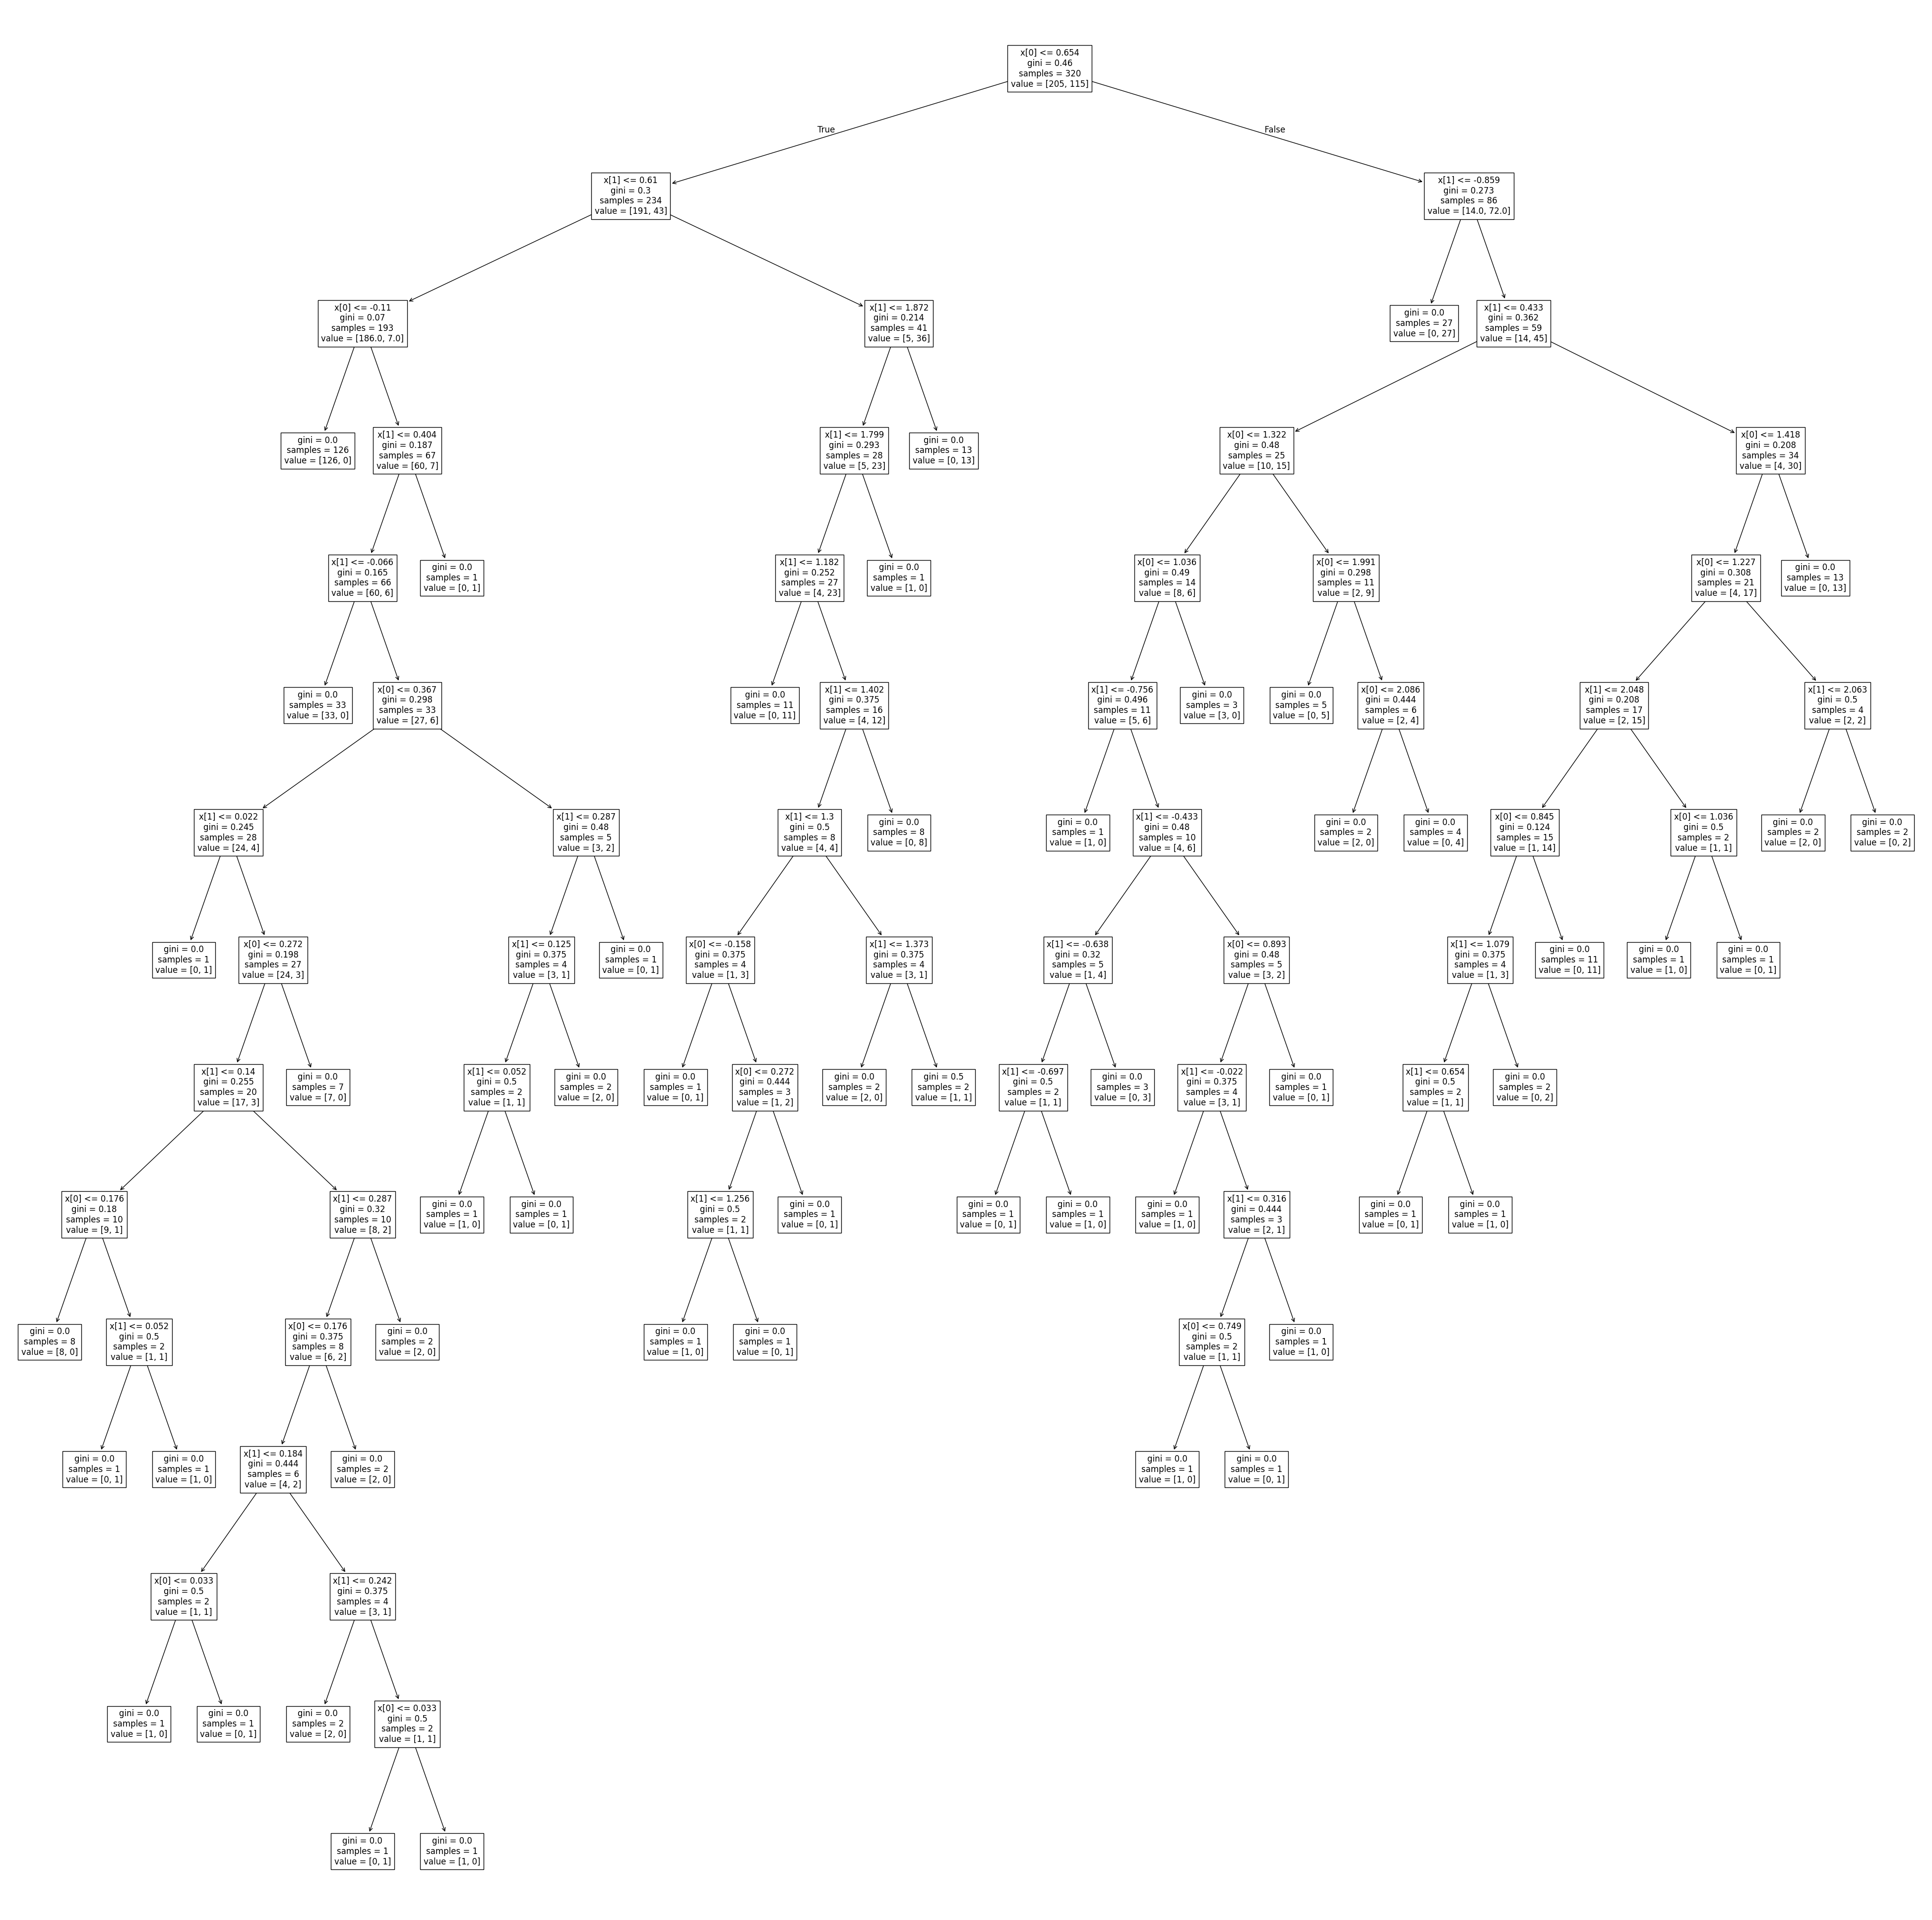

In [23]:
plt.figure(figsize=(50,50))
plot_tree(dt)
plt.savefig('decision_tree1.png')
plt.show()

c:\Users\Aamir Neyazi\Downloads\Machine Learning\.venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


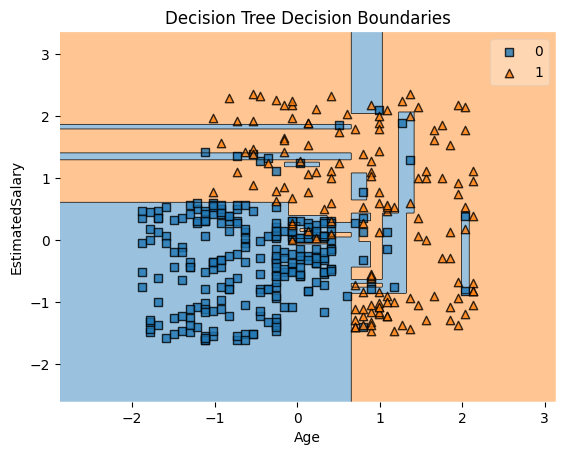

In [29]:
plot_decision_regions(X=x.values, y=y.values, clf=dt)
plt.xlabel('Age')
plt.ylabel('EstimatedSalary')
plt.title('Decision Tree Decision Boundaries')
plt.show()

In [38]:
for i in range(1, 20):
    dt_temp = DecisionTreeClassifier(max_depth=i)
    dt_temp.fit(x_train, y_train)
    train_score = dt_temp.score(x_train, y_train)
    test_score = dt_temp.score(x_test, y_test)
    print(f'Max Depth: {i}, Train Score: {train_score*100:.2f}%, Test Score: {test_score*100:.2f}%')

Max Depth: 1, Train Score: 82.19%, Test Score: 90.00%
Max Depth: 2, Train Score: 91.88%, Test Score: 91.25%
Max Depth: 3, Train Score: 91.88%, Test Score: 91.25%
Max Depth: 4, Train Score: 93.12%, Test Score: 91.25%
Max Depth: 5, Train Score: 93.44%, Test Score: 90.00%
Max Depth: 6, Train Score: 95.00%, Test Score: 86.25%
Max Depth: 7, Train Score: 96.88%, Test Score: 85.00%
Max Depth: 8, Train Score: 97.50%, Test Score: 85.00%
Max Depth: 9, Train Score: 98.12%, Test Score: 85.00%
Max Depth: 10, Train Score: 98.44%, Test Score: 85.00%
Max Depth: 11, Train Score: 99.06%, Test Score: 83.75%
Max Depth: 12, Train Score: 99.06%, Test Score: 83.75%
Max Depth: 13, Train Score: 99.38%, Test Score: 83.75%
Max Depth: 14, Train Score: 99.69%, Test Score: 83.75%
Max Depth: 15, Train Score: 99.69%, Test Score: 83.75%
Max Depth: 16, Train Score: 99.69%, Test Score: 83.75%
Max Depth: 17, Train Score: 99.69%, Test Score: 83.75%
Max Depth: 18, Train Score: 99.69%, Test Score: 83.75%
Max Depth: 19, Trai